# **Image Classification [Part 2]**
---

**Required Reading**

[Ian Goodfellow's Deep Learning - Chapter 1, Section 6.2, and Section 8.1](https://www.deeplearningbook.org/contents/intro.html)

**Additional Reading/Viewing**

[Outstanding YouTube Series from 3 Blue 1 Brown](https://www.youtube.com/watch?v=aircAruvnKk)

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:

````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

## 1. Convolutional Neural Networks
---

- Last time, in Image Classification Part 1, we left off wondering how Yann LeCun beat our 5 layer deep network way back in 1998. 
- Here's a clip of Yann in 1993 at AT&T Bell Labs demonstrating LeNet-1, a precursor to his 1998 network.

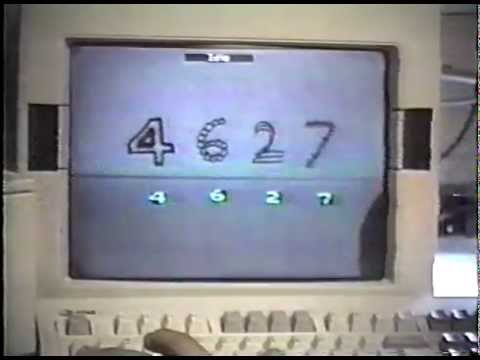

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('FwFduRA_L6Q', width = 960, height = 540)

- Yann LeCun joined AT&T Bell Labs in 1988 after leaving a postdoc position on Geoff Hinton's lab at the University of Toronto. 
- LeCun's research focused on optical charecter recognition (OCR), and developed a system that was used to read 10% of all the checks in the US in the late 1990s and early 2000s. [Source](https://en.wikipedia.org/wiki/Yann_LeCun).
- His collaborators at AT&T included Leon Bottou and [Vladimir Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik).
- In 2013, Yann became the director of Facebook AI Research (FAIR). 

### **So how did Yann Lecun beat our 5-layer deep network way back in 1998?**


- The key difference between Yann's network and ours is an idea that Yann called **weight sharing** in his [1989 Publication on Handwritten Zip Code Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf).

![](../graphics/birth_of_modern_cnn-01.png)

- Today we call Yann's idea a Convolutional Neural Network (CNN). 
- [Goodfellow](https://www.deeplearningbook.org/contents/convnets.html) gives a nice CNN definition: 
*"Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers."*

### **They Should Really Be Called "Cross Correlation Neural Networks"**

![](../graphics/filter_animation.gif)

- The convolution operation is used in many areas of mathematics and engineering, we can express 2d convolution like this:
$$
S(i, j) = \sum_m \sum_n I(i-m, j-n)K(m, n)
$$
- Where $I$ is our input image, $K$ is kernel and S is our output. 
- Subtracting $m$ and $n$ from $i$ and $j$ has the effect of flipping our kernel $K$ makes convolution commutative. However, in Convolutional Neural Networks, we don't really care about the commutative property, and many libraries, including tensorflow implement the **cross-correlation** function instead of **convolution**:

$$
S(i, j) = \sum_m \sum_n I(i+m, j+n)K(m, n)
$$

![](../graphics/spacer_small.png)

### 1.1 CNN Walkthrough
---

- Let's walkthrough how CNNs process input images. 
- We'll borrow some slides from [Stanford's CS 231n: Convolutional Neural Networks for Visual Recognition](https://www.youtube.com/watch?v=LxfUGhug-iQ&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=7).
- A nice way to think about the convolutional operations we apply in neural networks is **operations on volumes**, as opposed to the operations on vectors we saw with regular neural networks:


In [2]:
from IPython.display import Image, display
from ipywidgets import interact

def slide_show(slide_num=1):     
    display(Image('../graphics/cs_231n_cnn_slides/cs_231n_' + str(slide_num) + '.png'))

In [5]:
interact(slide_show, slide_num = (1, 5));

interactive(children=(IntSlider(value=1, description='slide_num', max=5, min=1), Output()), _dom_classes=('wid…

![](../graphics/spacer_small.png)

### 1.2 Padding + Strides
---

- As you can imagine, there are many variants of convolution used in CNNs, there's a [really great paper on this](https://arxiv.org/pdf/1603.07285.pdf). 
- Changing our padding or strides will change the size of our data as it flows through our network. 

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="../graphics/conv_animations/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="../graphics/conv_animations/no_padding_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/padding_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>

![](../graphics/spacer_small.png)

### 1.3 How is LeNet-5 so good?
---

- As nicely stated the exceprt from Yann Lecun's 1989 paper above, CNNs "allow us to express information about the geometry and topology of the task". The arrangement of the pixels in our images is not arbitrary, and we know the lots of information can be gleaned by looking at local neighborhoods of our images (such as edge detection) - CNNs are a good for this. 
- Aside from taking advantage of the topology of images, CNNs are also **incredibly efficient**. 
- Let's have a look at LeCun's 1998 convolutional neueral network, LeNet-5, that achieves a 99.05 accuracy on mnist.

![](../graphics/question_two-01.png)

---

![](../graphics/question_three-01.png)

- So, the first layer of LeNet-5 has way less parameters than our 7 layer fully connected layers. 
- **Why might this be advantageous?**

![](../graphics/spacer_small.png)

### 1.4 Pooling
---

- Let's look at one more interesting idea from LeNet-5. After each convolutional layer, Yann includes a "subsampling" layer. Today we call this a **pooling** layer. 

![](../graphics/lenet_5_screenshot.png)

- Notice that after each of Yann's pooling layers, our feature maps decrease in size by a factor of 2. 

 ![](../graphics/pooling-01.png)

- Pooling makes our networks **approximately invariant** to translations in our input. 
- This can be advantageous in problems like image classification, where the exactly location of features is less important than their general location. 
- Pooling also reduces the size of our data at it flows through our network, allowing us to effectively make our networks smaller and more efficient.

### 1.5 Let's Train LeNet-5!
---

![](../graphics/lenet_5_screenshot.png)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
model = nn.Sequential(nn.Conv2d(1, 6 , kernel_size = 5), nn.Tanh(), 
                     nn.AvgPool2d(2), 
                     nn.Conv2d(6, 16 , kernel_size = 5), nn.Tanh(), 
                     nn.AvgPool2d(2), 
                     )

#Ok, I have to figure out the "view thing..."

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from torch import optim

In [ ]:
import numpy as np
from pathlib import Path
from matplotlib.pyplot import *
import pickle, gzip
from tqdm import tqdm

DATA_PATH = Path("../data")
PATH = DATA_PATH / "mnist"
FILENAME = "mnist.pkl.gz"

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

In [ ]:
#Create dataloaders
train_ds = TensorDataset(torch.tensor(x_train, dtype = torch.float), torch.tensor(y_train, dtype = torch.long))
train_dl = DataLoader(train_ds, batch_size=64, shuffle = True, num_workers = 4, drop_last = True)

valid_ds = TensorDataset(torch.tensor(x_valid, dtype = torch.float), torch.tensor(y_valid, dtype = torch.long))
valid_dl = DataLoader(valid_ds, batch_size=256, shuffle = True, num_workers = 4, drop_last = True)

- implemented a modern version of LeNet-5 in models/LeNet-5, with a few changes from Yann's original implementation:
    - Activation functions immediately follow conv layers, not pooling layers. 
    - Our pooling layers don't have learnable parameters, unlike LeCun's sub-sampling layers 
    - We're using a cross entropy cost function, LeNet used radial basis functions 
    - We're using the Adam optimizer, LeCun used gradient descent with a variable learning rate.